In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
logs = pd.read_csv('3_logs.csv')
user_data = pd.read_csv('3_user_data.csv')

In [3]:
# logs ###############################################################################################

In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [5]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [6]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [7]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [8]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [9]:
logs.success.value_counts()

True     3289
False    1211
Name: success, dtype: int64

In [10]:
logs.platform.nunique()

3

In [11]:
# user_data ###############################################################################################

In [12]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [13]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [14]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [15]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [16]:
user_data.premium.value_counts()

False    2548
True      406
Name: premium, dtype: int64

In [17]:
##################################################################################################################

In [47]:
logs.loc[logs.loc[logs.success == True].client.value_counts() == max]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [18]:
success_counts = logs.loc[logs.success == True].client.value_counts()

In [19]:
success_counts

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: client, Length: 2845, dtype: int64

In [20]:
max_num = success_counts.max()
max_success_client = success_counts.loc[success_counts == max_num].sort_values()

In [21]:
max_num

41

In [22]:
max_success_client.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

In [23]:
##################################################################################################################

In [24]:
# С какой платформы приходит больше всего людей

In [25]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [26]:
##################################################################################################################

In [27]:
# Какая платформа популярна среди премиумных клиентов

In [28]:
all_data = logs.merge(user_data, how='inner', on='client')
succes_user_premium_by_platform = all_data.loc[all_data.premium == True] \
                        .platform.value_counts()
succes_user_premium_by_platform

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [29]:
##################################################################################################################

In [30]:
# Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [31]:
user_premium = all_data.loc[all_data.premium == True]

In [32]:
user_usual = all_data.loc[all_data.premium == False]

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


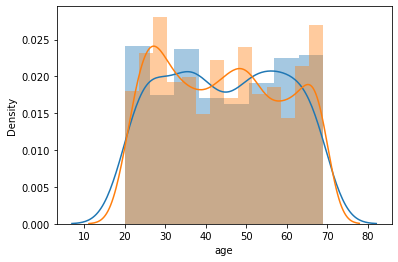

In [33]:
sns.distplot(user_premium.age)
sns.distplot(user_usual.age)

In [34]:
##################################################################################################################

In [35]:
# Построить график распределения числа успешных операций

In [36]:
number_of_success = all_data.loc[all_data.success == True] \
                                        .groupby('client', as_index=False) \
                                        .agg({'success': 'count'})
number_of_success

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2099,99908,1
2100,99926,1
2101,99927,1
2102,99931,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


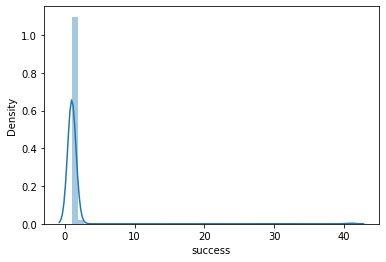

In [37]:
sns.distplot(number_of_success.success)

In [38]:
##################################################################################################################

In [39]:
# Визуализировать количество успешных операций на платформе computer в зависимости от возвраста

In [40]:
age_of_success = all_data.loc[all_data.platform == 'computer'].loc[all_data.success == True]

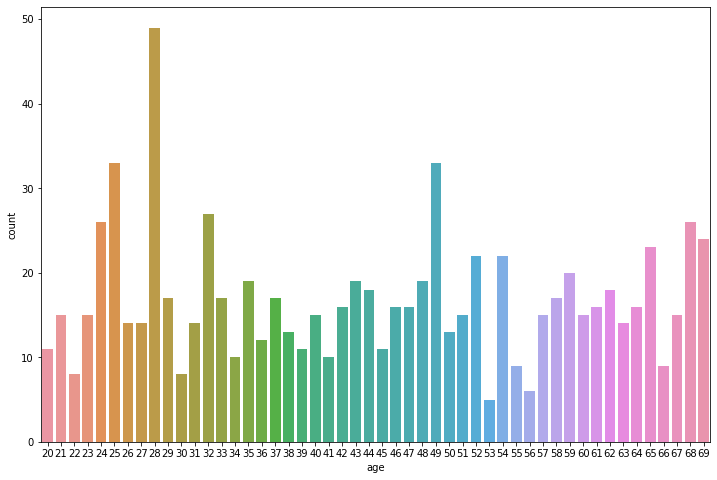

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=age_of_success)